In [49]:
#task4
import pandas as pd
import zipfile

# Define file path
zip_path = r"C:\Users\USER\Downloads\IMDB Dataset.csv.zip"

# Extract and load the CSV file
with zipfile.ZipFile(zip_path, 'r') as z:
    file_name = z.namelist()[0]  # Get the first file in the ZIP
    df = pd.read_csv(z.open(file_name))

# Display dataset info
print(df.head())  # View first few rows
print(df.info())  # Check data structure
print(df['sentiment'].value_counts())  # Check label distribution


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [57]:
import re

# Define a basic stopword list
stop_words = set(["the", "is", "in", "and", "to", "it", "of", "a", "this", "that", "i", "was", "for", "on", "with", "as", "but", "be", "at"])

# Text preprocessing function without external libraries
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    words = text.split()  # Tokenize text (split by space)
    words = [word.rstrip('s') for word in words if word not in stop_words]  # Basic lemmatization & stopword removal
    return " ".join(words)

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)
print(df.head())  # Check cleaned text


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  one other reviewer ha mentioned after watching...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time too hot summe...  
3  basically there family where little boy jake t...  
4  petter mattei love time money visually stunnin...  


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for efficiency

# Transform text data
X = vectorizer.fit_transform(df['cleaned_review']).toarray()  # Convert to array

# Extract labels (assuming sentiment is in a column named 'sentiment')
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert labels to binary (1 = positive, 0 = negative)

# Check transformed data
print(f"Feature matrix shape: {X.shape}")
print(f"Sample transformed data: {X[:2]}")


Feature matrix shape: (50000, 5000)
Sample transformed data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (40000, 5000)
Testing Data Shape: (10000, 5000)


In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [65]:
def predict_sentiment(review):
    processed_review = preprocess_text(review)  # Preprocess input
    review_vector = vectorizer.transform([processed_review]).toarray()  # Convert to TF-IDF
    prediction = model.predict(review_vector)[0]  # Predict
    return "Positive" if prediction == 1 else "Negative"

# Test with user input
sample_review = "I really loved the movie. It was amazing!"
print("Predicted Sentiment:", predict_sentiment(sample_review))


Predicted Sentiment: Positive


C:\Users\USER\AppData\Local\Temp\ipykernel_7056\3442913972.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="viridis")


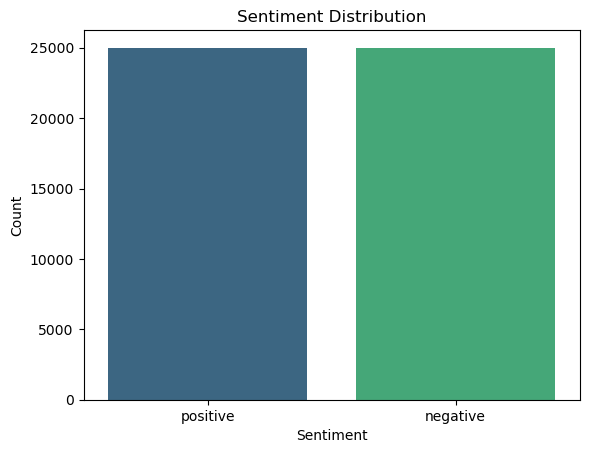

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of sentiments
sns.countplot(x=df['sentiment'], palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


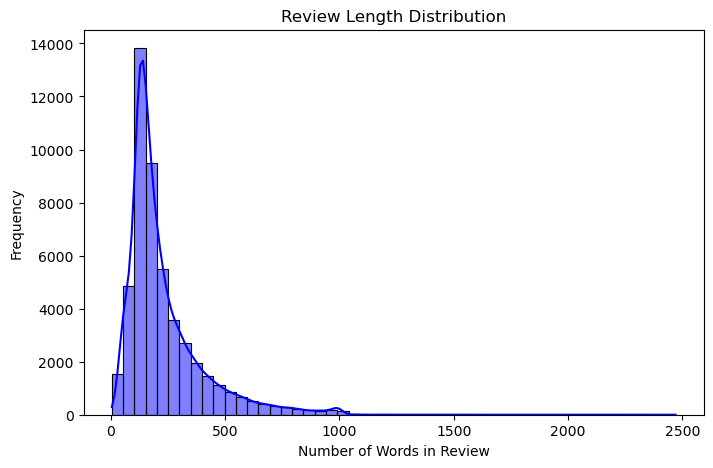

In [73]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Summary stats
print(df['review_length'].describe())

# Histogram of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=50, kde=True, color="blue")
plt.title("Review Length Distribution")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()
